In [11]:
import requests
import pandas as pd
import plotly.express as px
from prophet import Prophet

c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Air Polution Forecasting\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



### Setting API parameters

In [2]:
country_id = 13 # For the United States

# City keys
city1 = "Portland-South Portland-Biddeford"
city2 = "Portland-Vancouver-Beaverton"

# sensor id's
city1_ids = [855, 19840, 1195, 1923, 1083851]
city2_ids = [233585, 1067, 1068, 1069, 1502, 1527, 233545, 1064]

# Measurement parameters
measurement_param = "pm25"

# time period
start = "2024-10-06"
end = "2024-09-06"

### Running API Request

In [3]:
api_file = open("api_key.txt", "r")
key = api_file.read()
res = requests.get("https://api.openaq.org/v2/locations/2178", headers={"X-API-Key": key})

print(res)

<Response [200]>


### Testing City Pull

In [4]:
url = "https://api.openaq.org/v2/countries"
headers = {"accept": "application/json"}
city_list = requests.get(url, headers=headers)

print(city_list.text)

{"meta":{"name":"openaq-api","license":"","website":"/","page":1,"limit":100,"found":">100"},"results":[{"code":"AF","name":"Afghanistan","locations":2,"firstUpdated":"2019-10-20 22:30:00+00","lastUpdated":"2021-08-16 18:00:00+00","parameters":["pm25"],"count":23640,"cities":1,"sources":2},{"code":"DZ","name":"Algeria","locations":1,"firstUpdated":"2019-06-15 22:00:00+00","lastUpdated":"2024-06-16 02:00:00+00","parameters":["pm25"],"count":39072,"cities":1,"sources":1},{"code":"AQ","name":"Antarctica","locations":2,"firstUpdated":"2018-11-30 11:00:00+00","lastUpdated":"2021-02-04 14:00:00+00","parameters":["co","no2","o3","pm10","pm25","so2"],"count":9180,"cities":0,"sources":2},{"code":"AR","name":"Argentina","locations":17,"firstUpdated":"2016-01-01 03:00:00+00","lastUpdated":"2024-06-16 03:00:00+00","parameters":["co","no","no2","nox","o3","pm1","pm10","pm25","relativehumidity","so2","temperature","um003"],"count":295945,"cities":1,"sources":6},{"code":"AM","name":"Armenia","locatio

In [5]:
url = "https://api.openaq.org/v2/cities?limit=100&page=1&offset=0&sort=asc&order_by=city"
headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

print(response.text)

{"meta":{"name":"openaq-api","license":"","website":"/","page":1,"limit":100,"found":4373},"results":[{"country":"DK","city":" ","count":23688,"locations":1,"firstUpdated":"2017-11-09 23:00:00+00","lastUpdated":"2024-04-05 08:00:00+00","parameters":["no2"]},{"country":"JP","city":" ","count":39853907,"locations":1538,"firstUpdated":"2023-07-14 17:00:00+00","lastUpdated":"2024-06-16 01:00:00+00","parameters":["co","no","no2","nox","pm25","so2"]},{"country":"KP","city":" ","count":35571,"locations":4,"firstUpdated":"2024-03-20 08:00:00+00","lastUpdated":"2024-06-16 01:00:00+00","parameters":["co","no2","o3","pm10","pm25","so2"]},{"country":"KR","city":" ","count":7477771,"locations":683,"firstUpdated":"2024-03-20 08:00:00+00","lastUpdated":"2024-06-16 01:00:00+00","parameters":["co","no2","o3","pm10","pm25","so2"]},{"country":"TT","city":" ","count":4001,"locations":1,"firstUpdated":"2024-03-20 01:00:00+00","lastUpdated":"2024-06-12 14:00:00+00","parameters":["co","pm10","pm25"]},{"count

### Returning for a City

In [6]:
url = "https://api.openaq.org/v2/averages?temporal=day&locations_id=70084&spatial=location&limit=100&page=1"
headers = {"accept": "application/json"}
response = requests.get(url, headers=headers)

print(response.text)

{"meta":{"name":"openaq-api","license":"","website":"/","page":1,"limit":100,"found":0},"results":[]}


### Testing Data Pull
Returns latest measurement for location 1067 in portland oregon

In [7]:
def query_weather_data(location):

    # Defining url for location and requesting data
    url = "https://api.openaq.org/v2/measurements?date_from=2024-05-30T00%3A00%3A00Z&date_to=2024-06-06T20%3A45%3A00Z&limit=5000&page=1&offset=0&sort=desc&parameter_id=2&radius=1000&location_id={}&order_by=datetime".format(location)
    headers = {"accept": "application/json"}
    response = requests.get(url, headers=headers)
    converted = response.json()['results']
    print(converted)

    # Defining lists for data parsing
    values = []
    date = []
    location = []
    parameter = []
    
    # Iterating through dict and appending values
    for entry in converted:
        values.append(entry['value'])
        date.append(entry['date']['utc'])
        location.append(entry['locationId'])
        parameter.append(entry['parameter'])

    df = pd.DataFrame.from_dict({"Date": date,
                                "Value": values,
                                "location": location,
                                "parameter": parameter})
    return df

In [8]:
test_location = 1067
test_df = query_weather_data(test_location)
test_df.head(10)

[{'locationId': 1067, 'location': 'Portland - Sauvie Is', 'parameter': 'pm25', 'value': 4.0, 'date': {'utc': '2024-06-06T20:00:00+00:00', 'local': '2024-06-06T13:00:00-07:00'}, 'unit': 'µg/m³', 'coordinates': {'latitude': 45.768531, 'longitude': -122.7721}, 'country': 'US', 'city': None, 'isMobile': False, 'isAnalysis': None, 'entity': 'Governmental Organization', 'sensorType': 'reference grade'}, {'locationId': 1067, 'location': 'Portland - Sauvie Is', 'parameter': 'pm25', 'value': 4.6, 'date': {'utc': '2024-06-06T19:00:00+00:00', 'local': '2024-06-06T12:00:00-07:00'}, 'unit': 'µg/m³', 'coordinates': {'latitude': 45.768531, 'longitude': -122.7721}, 'country': 'US', 'city': None, 'isMobile': False, 'isAnalysis': None, 'entity': 'Governmental Organization', 'sensorType': 'reference grade'}, {'locationId': 1067, 'location': 'Portland - Sauvie Is', 'parameter': 'pm25', 'value': 4.9, 'date': {'utc': '2024-06-06T18:00:00+00:00', 'local': '2024-06-06T11:00:00-07:00'}, 'unit': 'µg/m³', 'coord

,Date,Value,location,parameter
0,2024-06-06T20:00:00+00:00,4.0,1067,pm25
1,2024-06-06T19:00:00+00:00,4.6,1067,pm25
2,2024-06-06T18:00:00+00:00,4.9,1067,pm25
3,2024-06-06T17:00:00+00:00,4.9,1067,pm25
4,2024-06-06T16:00:00+00:00,4.8,1067,pm25
5,2024-06-06T15:00:00+00:00,5.0,1067,pm25
6,2024-06-06T14:00:00+00:00,4.9,1067,pm25
7,2024-06-06T13:00:00+00:00,4.8,1067,pm25
8,2024-06-06T12:00:00+00:00,4.8,1067,pm25
9,2024-06-06T11:00:00+00:00,4.9,1067,pm25


In [39]:
test_df['Data_Converted'] = test_df['Date'].str.slice(start = 0, stop = 10) + " " + test_df['Date'].str.slice(start = 11)
#test_df['test'] = test_df['test'].astype('datetime64[ns]')
test_df['Data_Converted'] = pd.to_datetime(test_df['Data_Converted'], format='mixed') 
test_df.head(10)

,Date,Value,location,parameter,test,Data_Converted
0,2024-06-06T20:00:00+00:00,4.0,1067,pm25,2024-06-06 20:00:00+00:00,2024-06-06 20:00:00+00:00
1,2024-06-06T19:00:00+00:00,4.6,1067,pm25,2024-06-06 19:00:00+00:00,2024-06-06 19:00:00+00:00
2,2024-06-06T18:00:00+00:00,4.9,1067,pm25,2024-06-06 18:00:00+00:00,2024-06-06 18:00:00+00:00
3,2024-06-06T17:00:00+00:00,4.9,1067,pm25,2024-06-06 17:00:00+00:00,2024-06-06 17:00:00+00:00
4,2024-06-06T16:00:00+00:00,4.8,1067,pm25,2024-06-06 16:00:00+00:00,2024-06-06 16:00:00+00:00
5,2024-06-06T15:00:00+00:00,5.0,1067,pm25,2024-06-06 15:00:00+00:00,2024-06-06 15:00:00+00:00
6,2024-06-06T14:00:00+00:00,4.9,1067,pm25,2024-06-06 14:00:00+00:00,2024-06-06 14:00:00+00:00
7,2024-06-06T13:00:00+00:00,4.8,1067,pm25,2024-06-06 13:00:00+00:00,2024-06-06 13:00:00+00:00
8,2024-06-06T12:00:00+00:00,4.8,1067,pm25,2024-06-06 12:00:00+00:00,2024-06-06 12:00:00+00:00
9,2024-06-06T11:00:00+00:00,4.9,1067,pm25,2024-06-06 11:00:00+00:00,2024-06-06 11:00:00+00:00


### Visualizing

In [40]:
fig = px.line(test_df, x = 'Date', y = 'Value', title = 'Polution over time')
fig.show()

### Training Model

In [47]:
train = test_df[['Data_Converted', 'Value']]
train = train.rename(columns = {'Data_Converted': 'ds', 'Value': 'y'})
train['ds'] = train['ds'].dt.tz_localize(None)

# Fitting model
model = Prophet()
model.fit(train)

# Making prediction
future = model.make_future_dataframe(periods=5)
future.tail()


09:07:36 - cmdstanpy - INFO - Chain [1] start processing
09:07:36 - cmdstanpy - INFO - Chain [1] done processing


,ds
100,2024-06-07 20:00:00
101,2024-06-08 20:00:00
102,2024-06-09 20:00:00
103,2024-06-10 20:00:00
104,2024-06-11 20:00:00


In [48]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
100,2024-06-07 20:00:00,5.641749,3.728650,7.345238
101,2024-06-08 20:00:00,6.126312,4.268524,8.110646
102,2024-06-09 20:00:00,6.610875,4.732172,8.525942
103,2024-06-10 20:00:00,7.095438,5.268061,8.823335
104,2024-06-11 20:00:00,7.580002,5.800009,9.453791


c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Air Polution Forecasting\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Air Polution Forecasting\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



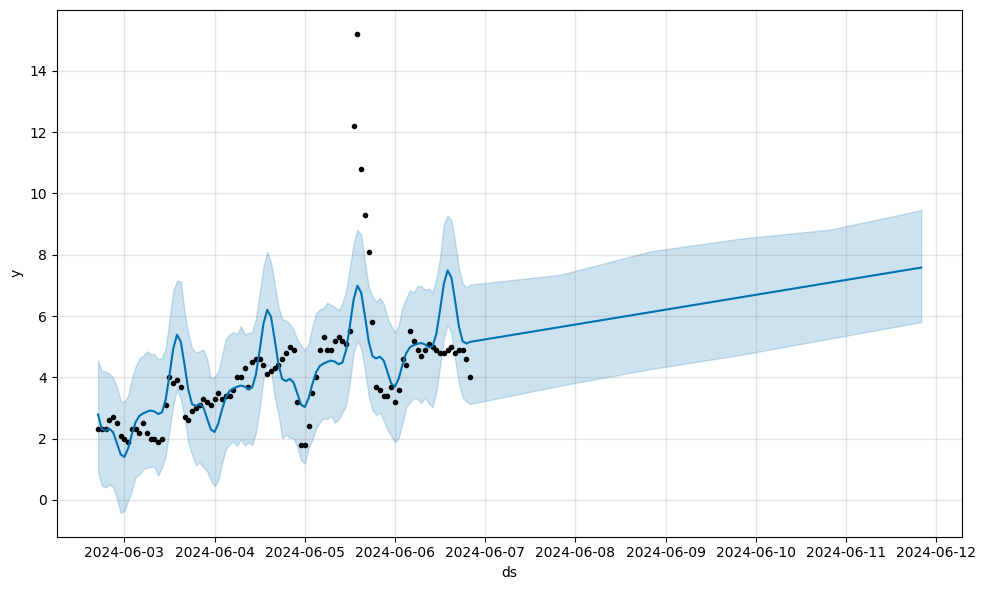

In [49]:
fig1 = model.plot(forecast)